In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df=pd.read_csv('Titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

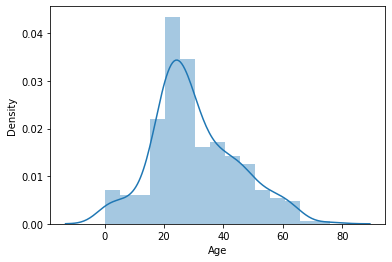

In [12]:
sns.distplot(df['Age'])

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

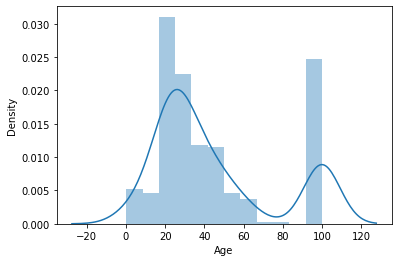

In [14]:
sns.distplot(df['Age'].fillna(100))

#Age has 100 as outliers now...This can be seen by distr plot also..

Text(0, 0.5, 'No of passengers')

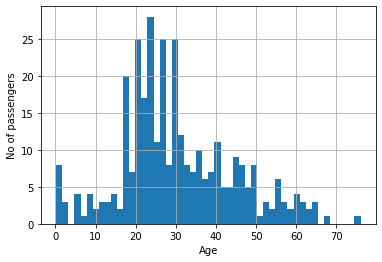

In [21]:
fig=df['Age'].hist(bins=50)
fig.set_xlabel('Age')
fig.set_ylabel('No of passengers')

#Almost like a Gaussian Distribution of Age but not strict though.. 
#Ages at random (although follows Normal/Gaussian distribution)

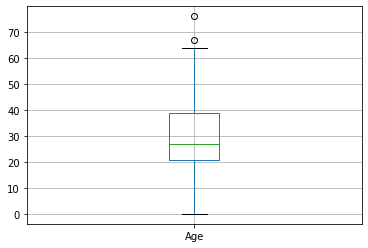

In [22]:
fig=df.boxplot(column='Age')

In [23]:
df['Age'].describecribe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [26]:
# Assuming Age follows a Gaussian Distribution, we will calculate the boundaries which differentiates the outliers

mean= df['Age'].mean()
print(mean)
left_bound= mean-3*(df.Age.std())
print(left_bound)
right_bound= mean+3*(df.Age.std())
print(right_bound)

30.272590361445783
-12.271037345427484
72.81621806831905


In [30]:
#Computing InterQuartileRange IQR to find out the boundaries.

Q1= df.Age.quantile(0.25)
Q3= df.Age.quantile(0.75)
IQR=Q3-Q1
print(IQR)

lower_bound= Q1-(1.5*IQR)
print(lower_bound)
upper_bound=Q3+(1.5*IQR)
print(upper_bound)

#1.5 value also depends on Domain but mostly taken as 1.5 for Normal/Gaussian Distribution

18.0
-6.0
66.0


In [32]:
#For computing EXTREME OUTLIERS....

Q1= df.Age.quantile(0.25)
Q3= df.Age.quantile(0.75)
IQR=Q3-Q1
print(IQR)

lower_bound= Q1-(3*IQR)
print(lower_bound)
upper_bound=Q3+(3*IQR)
print(upper_bound)


18.0
-33.0
93.0


In [33]:
#But max is 80 as age, so taking extreme outliers wont work, so taking values as 1.5

Text(0, 0.5, 'No of passengers')

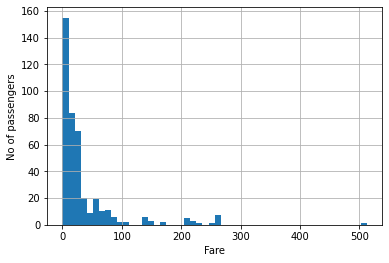

In [35]:
#IF Features are skewed.. in this case id Fare is =+vely skewed or right skewed.

fig=df['Fare'].hist(bins=50)
fig.set_xlabel('Fare')
fig.set_ylabel('No of passengers')


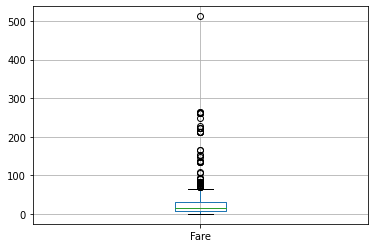

In [36]:
fig=df.boxplot(column='Fare')

In [37]:
df.Fare.describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [38]:

Q1= df.Fare.quantile(0.25)
Q3= df.Fare.quantile(0.75)
IQR=Q3-Q1
print(IQR)

lower_bound= Q1-(1.5*IQR)
print(lower_bound)
upper_bound=Q3+(1.5*IQR)
print(upper_bound)


23.6042
-27.5105
66.9063


### For Skewed Dataset (Left/Right) for extreme outliers

In [39]:
#For computing EXTREME OUTLIERS....  For Data is skewed

Q1= df.Fare.quantile(0.25)
Q3= df.Fare.quantile(0.75)
IQR=Q3-Q1
print(IQR)

lower_bound= Q1-(3*IQR)
print(lower_bound)
upper_bound=Q3+(3*IQR)
print(upper_bound)


23.6042
-62.9168
102.3126


In [48]:
data=df.copy()

### Capping the outliers with Upper Bound Values for Age and Fare.

In [49]:
data.loc[data['Age']>=73, 'Age']=73

In [50]:
data[data.Age>71].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
96,988,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,73.0,1,0,19877,78.85,C46,S


In [51]:
data.loc[data['Fare']>=102, 'Fare']=102

In [52]:
data[data['Fare']>100].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,102.0,B57 B59 B63 B66,C
53,945,1,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,19950,102.0,C23 C25 C27,S
59,951,1,1,"Chaudanson, Miss. Victorine",female,36.0,0,0,PC 17608,102.0,B61,C
64,956,0,1,"Ryerson, Master. John Borie",male,13.0,2,2,PC 17608,102.0,B57 B59 B63 B66,C
69,961,1,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,102.0,C23 C25 C27,S


Text(0, 0.5, 'No of passengers')

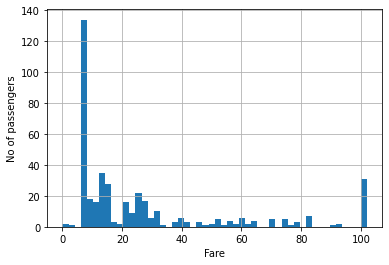

In [53]:
fig=data['Fare'].hist(bins=50)
fig.set_xlabel('Fare')
fig.set_ylabel('No of passengers')


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

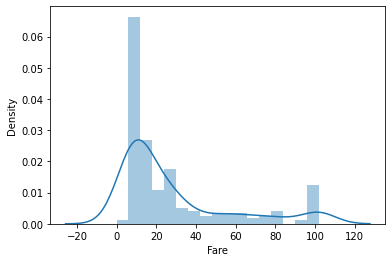

In [55]:
sns.distplot(data['Fare'])

Text(0, 0.5, 'No of passengers')

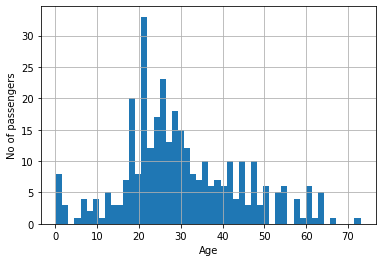

In [56]:
fig=data['Age'].hist(bins=50)
fig.set_xlabel('Age')
fig.set_ylabel('No of passengers')

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

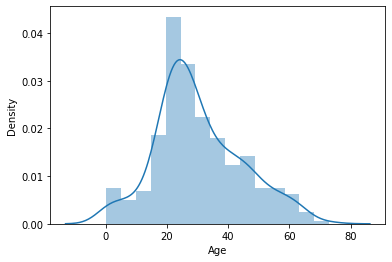

In [57]:
sns.distplot(data['Age'])

In [58]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64